In [1]:
# #pulled from Brian
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import seaborn as sns
# from sklearn.cluster import KMeans
# # from sklearn.datasets.samples_generator import make_blobs
# from sklearn.datasets import make_blobs

# #custom visuals for this lesson
# import viz_kmeans

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

### Introduction: K-Means clustering algorithm
- Unsupervised Algorithm
- Search for a pre-determined number of clusters within an unlabeled dataset 
- k = number of clusters (user specified)
- Distance based

### How K-means algorithm works:

Step 1:  Randomly choose k starting centers

Step 2: **Cluster Assignment:**  
        Assign each observation to nearest Center (based on distance). Observations assigned to a center are part of a cluster.  
     
Step 3: **Move Centeroids:**  
Recalculate new centroids location (mean of observations within a cluster).  

Step 4+: Keep repeating step 2 and 3 until centers do not move.

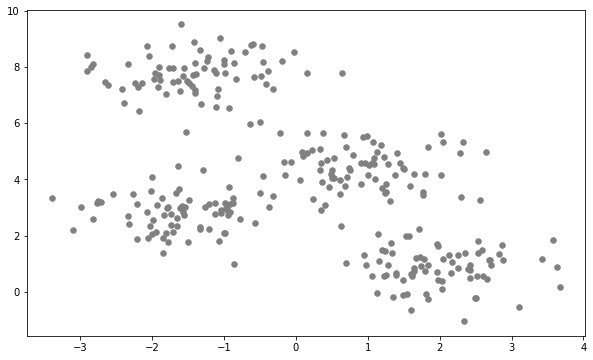

In [3]:
# visualize some data 
viz_kmeans.make_blob()

### Visualization: 

K-means visuals (Slideshow): 
https://docs.google.com/presentation/d/1NtMLd4fp2pi_bDJiIg2O-5g48xJiXjtYFad42B6Pj6Q/edit?usp=sharing

Animation (Thanks Zach!): https://stats-demos.zach.wiki/static/kmeans_clustering.mp4

### Sklearn implementation

In [4]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]
X.head()

,sepal_length,petal_length
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4


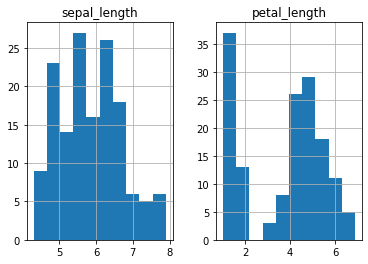

In [7]:
# look at distribution of sepal length and petal_length

X.hist();

In [8]:
# Scale the X
#standard scaller uses stdev as a unit - (review again) - it has been a month

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [9]:
#when clustering on your zillow dataset - as always cluster on train first


In [10]:
# look at the head
X_scaled.head()

,sepal_length,petal_length
1,-0.900681,-1.340227
2,-1.143017,-1.340227
3,-1.385353,-1.397064
4,-1.506521,-1.283389
5,-1.021849,-1.340227


In [11]:
# sklearn implementation of KMeans

#starting with 3 clusters - always set the random_state
#fitting on X_scaled - ovb post split

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)


# once it has found those centroids - define what cluster it belongs to


# Use (predict using) the thing 
kmeans.predict(X_scaled)

#our output is an array from 0-2 showing what # observation belongs to what cluster
# [verbose = 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [12]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [13]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
33,5.2,4.1,1.5,0.1,setosa,1
136,7.7,3.0,6.1,2.3,virginica,0
48,4.6,3.2,1.4,0.2,setosa,1
39,4.4,3.0,1.3,0.2,setosa,1
149,6.2,3.4,5.4,2.3,virginica,2
115,5.8,2.8,5.1,2.4,virginica,2
150,5.9,3.0,5.1,1.8,virginica,2
35,4.9,3.1,1.5,0.2,setosa,1
116,6.4,3.2,5.3,2.3,virginica,0
139,6.0,3.0,4.8,1.8,virginica,2


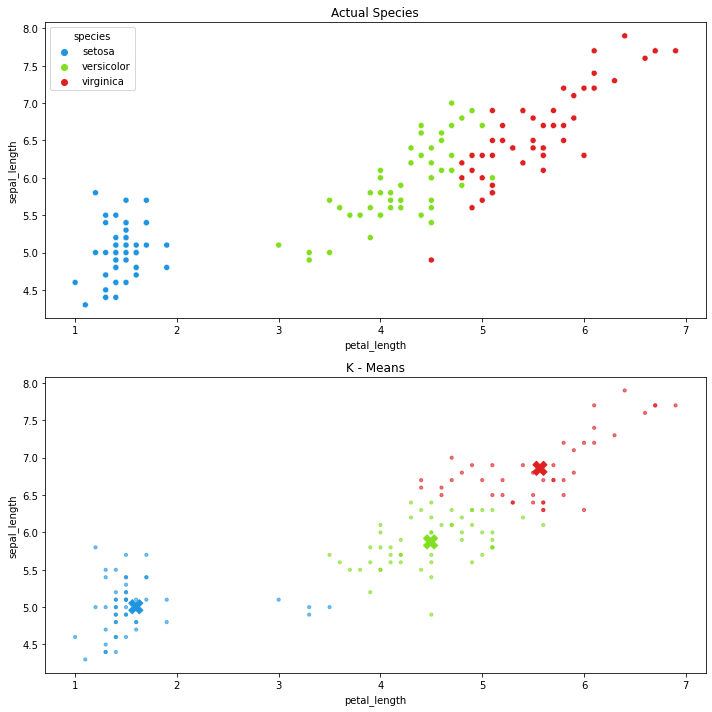

In [14]:
# Viz_kmeans needs to be pulled from git

# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [15]:
# Cluster Centers aka centroids. The output is scaled!!
# this gives us cluster centers

kmeans.cluster_centers_

array([[ 1.22961906,  1.02844019],
       [-1.01511749, -1.22865676],
       [ 0.03665519,  0.41744409]])

In [16]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_length,petal_length
0,1.229619,1.028440
1,-1.015117,-1.228657
2,0.036655,0.417444


In [17]:
# Centriods for unscaled data?
# centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
# centroids

In [18]:
# How to get unscaled centroids?
# inverse transform to switch from scaled

#now we have both and can use which one we prefer

scaler.inverse_transform(kmeans.cluster_centers_)

array([[6.85813953, 5.56744186],
       [5.00555556, 1.5962963 ],
       [5.87358491, 4.49245283]])

In [19]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

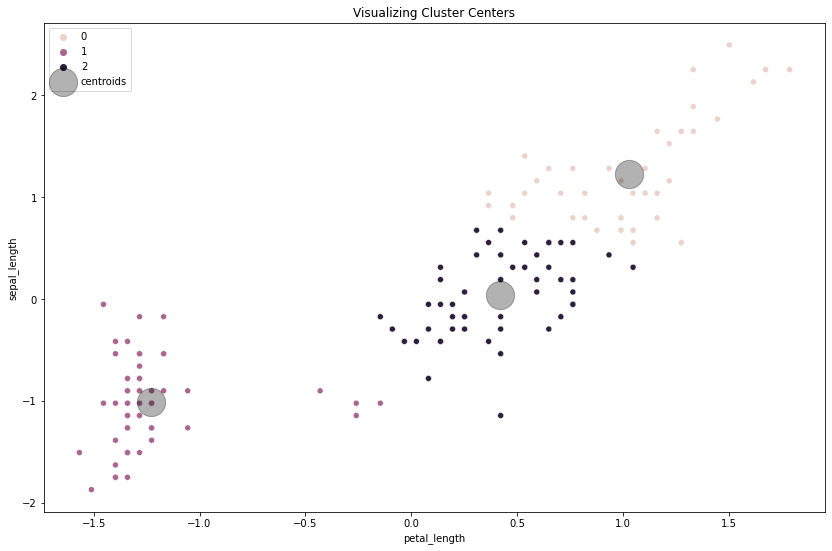

In [20]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_length', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_length',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [22]:
#Creating new column to define what cluster it is in
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


NameError: name 'centroids' is not defined

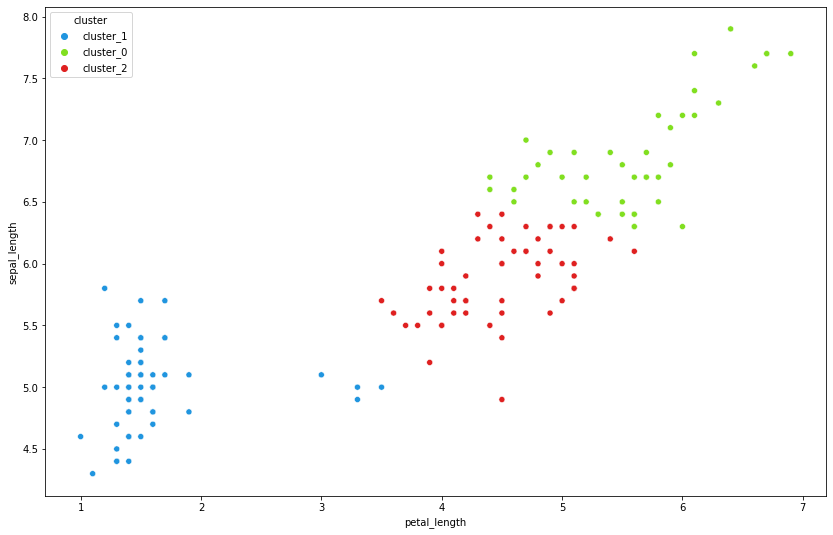

In [23]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_length', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_length', y = 'sepal_length',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

### Look at two clusters (i.e k = 2)

In [24]:
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

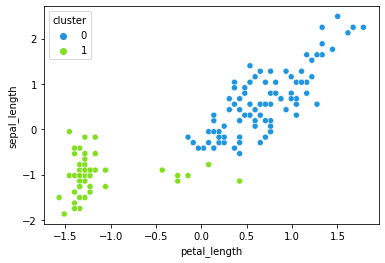

In [25]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_length', y='sepal_length', data = X_scaled, hue = 'cluster')

## How to choose 'k'

#### A-*priori* knowledge about application domain/educated guess
-  How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### Search for a 'good' k value
- Try different k values and evaluate results
    - Inertia = sum of squared distances from each point to it's assigned centroid  
    - minimize inertia(?)
    - Use elbow method (using inertia) to choose k

#### Use hierarchical clustering
- Try on a subset of data and guess k

In [26]:
# kmeans object has 'interia' attribute
# low interia is always better
kmeans.inertia_

84.72073862193372

In [27]:
#we can run this for different values of k to look at our interia
X = iris[['petal_length', 'sepal_length']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

84.72073862193372

In [28]:
# interia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

43.034691996034674

In [29]:
# interia with k = 4
# interia decreases as we have more K - would reach 0 when we have K = to observations
k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

28.486372225447568

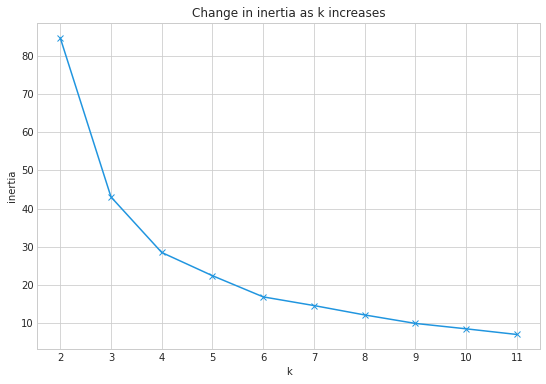

In [30]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

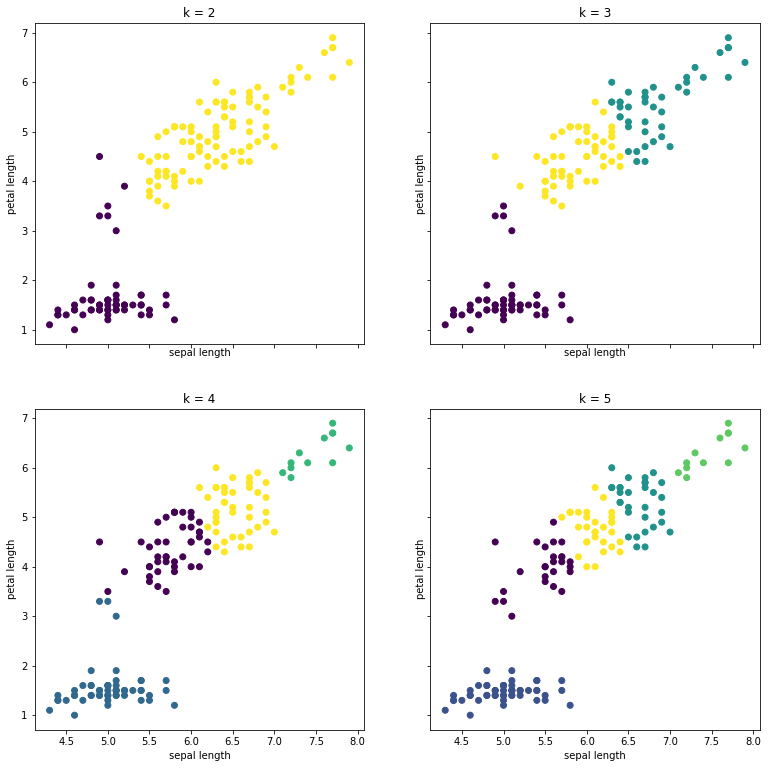

In [31]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [32]:
# Challenges:

# Which features should I use to create clusters?
# what k should I select?
# Are clusters meaningful and provide any value?